* **all_files**: the folder that contains all the forum posts. Each file contains a sentence. The file name is formatted as commentID_sentenceNumber.txt, so the files that share the same number before the underscore pertain to the same comment.
* **sampled_train**: a balanced set of files (for "hate" and "noHate" classes) sampled from all_files, used for experiments.
* **sampled_test**: a balanced set of files (for "hate" and "noHate" classes) sampled from all_files, used for experiments.
* **annotations_metadata.csv**: this file contains the actual label for each file in the previous folders; additionally, it reports how much additional context the annotator required to make a decision over each sentence, the user id, and the subforum id (ids are just numbers that do not further identify people).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the data
twitter = pd.read_csv("annotations_metadata.csv")
twitter

,file_id,user_id,subforum_id,num_contexts,label
0,12834217_1,572066,1346,0,noHate
1,12834217_2,572066,1346,0,noHate
2,12834217_3,572066,1346,0,noHate
3,12834217_4,572066,1346,0,hate
4,12834217_5,572066,1346,0,noHate
...,...,...,...,...,...
10939,33676864_5,734541,1388,0,noHate
10940,33677019_1,735154,1388,0,noHate
10941,33677019_2,735154,1388,0,noHate
10942,33677053_1,572266,1388,0,hate


In [3]:
# Select the object type columns
df_obj = twitter.select_dtypes(include=['object']).copy()
df_obj.head()

,file_id,label
0,12834217_1,noHate
1,12834217_2,noHate
2,12834217_3,noHate
3,12834217_4,hate
4,12834217_5,noHate


In [4]:
# Check that there is empty value
df_obj[df_obj.isnull().any(axis=1)]

,file_id,label


In [5]:
# Get the information of the columns that I selected above
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10944 entries, 0 to 10943
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   file_id  10944 non-null  object
 1   label    10944 non-null  object
dtypes: object(2)
memory usage: 171.1+ KB


In [6]:
# Count the values for each variables on the column "label" 
df_obj["label"].value_counts()

noHate      9507
hate        1196
relation     168
idk/skip      73
Name: label, dtype: int64

* Among 10944 twits, 1196 of them are considered as "hate".

In [7]:
# Convert the categorical values to numerical values
cleanup_nums = {"label": {"noHate": 0, "hate": 1, "relation": 3, "idk/skip ": 4}}
df_obj = df_obj.replace(cleanup_nums)
df_obj

,file_id,label
0,12834217_1,0
1,12834217_2,0
2,12834217_3,0
3,12834217_4,1
4,12834217_5,0
...,...,...
10939,33676864_5,0
10940,33677019_1,0
10941,33677019_2,0
10942,33677053_1,1


In [8]:
# Select the values that are labled as "noHate"
noHate = df_obj[df_obj['label'] == 0 ]
noHate

,file_id,label
0,12834217_1,0
1,12834217_2,0
2,12834217_3,0
4,12834217_5,0
5,12834217_6,0
...,...,...
10938,33676864_4,0
10939,33676864_5,0
10940,33677019_1,0
10941,33677019_2,0


In [9]:
# Select the values that are labled as "hate"
hate = df_obj[df_obj['label'] == 1 ]
hate

,file_id,label
3,12834217_4,1
10,12834493_1,1
21,12849464_3,1
22,12849464_4,1
31,12855154_1,1
...,...,...
10908,31765387_2,1
10909,31768317_1,1
10930,32833386_1,1
10933,32976641_1,1


In [10]:
# Convert file_ID for hate variables to a list
fileID_hate = hate["file_id"].tolist()  
fileID_hate

['12834217_4',
 '12834493_1',
 '12849464_3',
 '12849464_4',
 '12855154_1',
 '12860820_1',
 '12869018_3',
 '12883101_1',
 '12904919_1',
 '13061184_1',
 '13061184_2',
 '13293414_1',
 '13391410_1',
 '13401474_2',
 '13401474_3',
 '13406897_1',
 '13406897_2',
 '13406897_3',
 '13422115_2',
 '13434590_2',
 '13444199_1',
 '13446781_3',
 '13449094_1',
 '13454668_1',
 '13456921_1',
 '13461719_2',
 '13467569_3',
 '13477084_2',
 '13477295_1',
 '13477295_2',
 '13477295_3',
 '13477865_1',
 '13477865_2',
 '13480997_1',
 '13480997_2',
 '13484158_1',
 '13484158_2',
 '13484565_1',
 '13488146_2',
 '13488914_1',
 '13503555_1',
 '13506182_1',
 '13507183_1',
 '13547398_2',
 '13604801_2',
 '13604948_1',
 '13605248_6',
 '13843249_1',
 '13843422_1',
 '13843729_1',
 '13844126_1',
 '13855496_1',
 '13857116_1',
 '13861429_1',
 '14023352_1',
 '14025960_2',
 '14026780_1',
 '14026780_2',
 '14032559_1',
 '14032740_2',
 '14034693_1',
 '14034808_1',
 '14039896_1',
 '14062890_1',
 '14068441_1',
 '14071005_1',
 '14074039

In [11]:
# Add a string to all the elements in the list above
string = '.txt'
fileID_hate = ["{}{}".format(i,string) for i in fileID_hate]
fileID_hate

['12834217_4.txt',
 '12834493_1.txt',
 '12849464_3.txt',
 '12849464_4.txt',
 '12855154_1.txt',
 '12860820_1.txt',
 '12869018_3.txt',
 '12883101_1.txt',
 '12904919_1.txt',
 '13061184_1.txt',
 '13061184_2.txt',
 '13293414_1.txt',
 '13391410_1.txt',
 '13401474_2.txt',
 '13401474_3.txt',
 '13406897_1.txt',
 '13406897_2.txt',
 '13406897_3.txt',
 '13422115_2.txt',
 '13434590_2.txt',
 '13444199_1.txt',
 '13446781_3.txt',
 '13449094_1.txt',
 '13454668_1.txt',
 '13456921_1.txt',
 '13461719_2.txt',
 '13467569_3.txt',
 '13477084_2.txt',
 '13477295_1.txt',
 '13477295_2.txt',
 '13477295_3.txt',
 '13477865_1.txt',
 '13477865_2.txt',
 '13480997_1.txt',
 '13480997_2.txt',
 '13484158_1.txt',
 '13484158_2.txt',
 '13484565_1.txt',
 '13488146_2.txt',
 '13488914_1.txt',
 '13503555_1.txt',
 '13506182_1.txt',
 '13507183_1.txt',
 '13547398_2.txt',
 '13604801_2.txt',
 '13604948_1.txt',
 '13605248_6.txt',
 '13843249_1.txt',
 '13843422_1.txt',
 '13843729_1.txt',
 '13844126_1.txt',
 '13855496_1.txt',
 '13857116_1

NOW, categorize the hate twits into 4 different hate crime types.

Hate crime types in CA
- Race/Ethnicity/Ancestry
- Religion/Political views
- Sexual Orientation
- Gender/Disability

In [12]:
import os 
import glob

In [13]:
# Import files that are contains actual comments on Twitter
path = "/Users/jayoungkim/Desktop/UCD_Winter_22/STA_141B/Project/PROJECT/all_files"
all_files = os.listdir(path)
all_files

['13458115_2.txt',
 '13367480_1.txt',
 '30422449_1.txt',
 '14651837_4.txt',
 '30527903_3.txt',
 '12870229_4.txt',
 '14053109_1.txt',
 '30399453_2.txt',
 '13591250_2.txt',
 '31713873_1.txt',
 '13617074_1.txt',
 '30586609_1.txt',
 '30386096_4.txt',
 '13511568_2.txt',
 '14059932_2.txt',
 '30526591_3.txt',
 '14104444_3.txt',
 '14673212_2.txt',
 '33222250_1.txt',
 '13481672_2.txt',
 '13501878_2.txt',
 '14035837_2.txt',
 '31728633_5.txt',
 '12860405_2.txt',
 '12848466_6.txt',
 '13458990_4.txt',
 '13449582_3.txt',
 '13245714_1.txt',
 '30561702_1.txt',
 '30413458_1.txt',
 '13864766_5.txt',
 '30405478_2.txt',
 '30559316_1.txt',
 '14296825_2.txt',
 '14651426_2.txt',
 '14104912_2.txt',
 '33045538_1.txt',
 '13379474_2.txt',
 '13849943_2.txt',
 '13498188_3.txt',
 '14055786_2.txt',
 '30582393_1.txt',
 '13456820_1.txt',
 '13482640_2.txt',
 '30632791_1.txt',
 '13462533_2.txt',
 '14031187_2.txt',
 '13502231_3.txt',
 '13569459_2.txt',
 '30462337_3.txt',
 '13456898_1.txt',
 '30436626_3.txt',
 '13472258_3

In [14]:
# Check the type of the variable 
type(all_files)

list

In [67]:
# Define the location of the directory
path =r"/Users/jayoungkim/Desktop/UCD_Winter_22/STA_141B/Project/PROJECT/all_files"

# Change the directory
os.chdir(path)   

# Iterate only hate files over all the files in the directory
corpus = []
for file in fileID_hate:
    if file in os.listdir():
         with open(file) as f_input:
                corpus.append(f_input.read())
print(corpus)

['Click below for a FREE download of a colorfully illustrated 132 page e-book on the Zionist-engineered INTENTIONAL destruction of Western civilization .', "She may or may not be a Jew but she 's certainly stupid , she seems to think the Blacks wo n't kill her alongside every other White they can get their dirty hands on , what a muppet !", "I 've always considered teaching as one of the professions I would like to get into , but not in a neighbourhood like that ... never. kids like that disgust me .", 'And the sad thing is the white students at those schools will act like that too .', "Their gods often had pale skin and blue eyes but I suppose literacy is n't valued highly by their cultural intelligencia .", 'Greece need a man like Adolf Hitler and now is the perfect time to start a national political movement to free Your country from the zionist bankers', 'He is a pathetic little chimp .', 'Try El Paso Texas Soo much mudd invasion that the river is the same color as those playing/cr

In [68]:
# Check the type of corpus
type(corpus)

list

### Tokenization

In [101]:
import nltk.corpus
import re
%matplotlib inline

In [102]:
# Convert a list to a sting
doc = ' '.join(corpus)
doc

'Click below for a FREE download of a colorfully illustrated 132 page e-book on the Zionist-engineered INTENTIONAL destruction of Western civilization . She may or may not be a Jew but she \'s certainly stupid , she seems to think the Blacks wo n\'t kill her alongside every other White they can get their dirty hands on , what a muppet ! I \'ve always considered teaching as one of the professions I would like to get into , but not in a neighbourhood like that ... never. kids like that disgust me . And the sad thing is the white students at those schools will act like that too . Their gods often had pale skin and blue eyes but I suppose literacy is n\'t valued highly by their cultural intelligencia . Greece need a man like Adolf Hitler and now is the perfect time to start a national political movement to free Your country from the zionist bankers He is a pathetic little chimp . Try El Paso Texas Soo much mudd invasion that the river is the same color as those playing/crossing in it .. ye

In [103]:
# Check the type of doc
type(doc)

str

In [104]:
# Separte by words
words = nltk.word_tokenize(doc)
words

['Click',
 'below',
 'for',
 'a',
 'FREE',
 'download',
 'of',
 'a',
 'colorfully',
 'illustrated',
 '132',
 'page',
 'e-book',
 'on',
 'the',
 'Zionist-engineered',
 'INTENTIONAL',
 'destruction',
 'of',
 'Western',
 'civilization',
 '.',
 'She',
 'may',
 'or',
 'may',
 'not',
 'be',
 'a',
 'Jew',
 'but',
 'she',
 "'s",
 'certainly',
 'stupid',
 ',',
 'she',
 'seems',
 'to',
 'think',
 'the',
 'Blacks',
 'wo',
 "n't",
 'kill',
 'her',
 'alongside',
 'every',
 'other',
 'White',
 'they',
 'can',
 'get',
 'their',
 'dirty',
 'hands',
 'on',
 ',',
 'what',
 'a',
 'muppet',
 '!',
 'I',
 "'ve",
 'always',
 'considered',
 'teaching',
 'as',
 'one',
 'of',
 'the',
 'professions',
 'I',
 'would',
 'like',
 'to',
 'get',
 'into',
 ',',
 'but',
 'not',
 'in',
 'a',
 'neighbourhood',
 'like',
 'that',
 '...',
 'never',
 '.',
 'kids',
 'like',
 'that',
 'disgust',
 'me',
 '.',
 'And',
 'the',
 'sad',
 'thing',
 'is',
 'the',
 'white',
 'students',
 'at',
 'those',
 'schools',
 'will',
 'act',
 'l

In [105]:
# Check the length and type of words
print(len(words))
print(type(words))

29026
<class 'list'>


In [106]:
# Remove some punctuations
words = re.findall(r"(?:\w+|'|;|!)+", doc)
words

['Click',
 'below',
 'for',
 'a',
 'FREE',
 'download',
 'of',
 'a',
 'colorfully',
 'illustrated',
 '132',
 'page',
 'e',
 'book',
 'on',
 'the',
 'Zionist',
 'engineered',
 'INTENTIONAL',
 'destruction',
 'of',
 'Western',
 'civilization',
 'She',
 'may',
 'or',
 'may',
 'not',
 'be',
 'a',
 'Jew',
 'but',
 'she',
 "'s",
 'certainly',
 'stupid',
 'she',
 'seems',
 'to',
 'think',
 'the',
 'Blacks',
 'wo',
 "n't",
 'kill',
 'her',
 'alongside',
 'every',
 'other',
 'White',
 'they',
 'can',
 'get',
 'their',
 'dirty',
 'hands',
 'on',
 'what',
 'a',
 'muppet',
 '!',
 'I',
 "'ve",
 'always',
 'considered',
 'teaching',
 'as',
 'one',
 'of',
 'the',
 'professions',
 'I',
 'would',
 'like',
 'to',
 'get',
 'into',
 'but',
 'not',
 'in',
 'a',
 'neighbourhood',
 'like',
 'that',
 'never',
 'kids',
 'like',
 'that',
 'disgust',
 'me',
 'And',
 'the',
 'sad',
 'thing',
 'is',
 'the',
 'white',
 'students',
 'at',
 'those',
 'schools',
 'will',
 'act',
 'like',
 'that',
 'too',
 'Their',
 'g

In [108]:
# Lowercasing the words
words = [w.lower() for w in words]
words

['click',
 'below',
 'for',
 'a',
 'free',
 'download',
 'of',
 'a',
 'colorfully',
 'illustrated',
 '132',
 'page',
 'e',
 'book',
 'on',
 'the',
 'zionist',
 'engineered',
 'intentional',
 'destruction',
 'of',
 'western',
 'civilization',
 'she',
 'may',
 'or',
 'may',
 'not',
 'be',
 'a',
 'jew',
 'but',
 'she',
 "'s",
 'certainly',
 'stupid',
 'she',
 'seems',
 'to',
 'think',
 'the',
 'blacks',
 'wo',
 "n't",
 'kill',
 'her',
 'alongside',
 'every',
 'other',
 'white',
 'they',
 'can',
 'get',
 'their',
 'dirty',
 'hands',
 'on',
 'what',
 'a',
 'muppet',
 '!',
 'i',
 "'ve",
 'always',
 'considered',
 'teaching',
 'as',
 'one',
 'of',
 'the',
 'professions',
 'i',
 'would',
 'like',
 'to',
 'get',
 'into',
 'but',
 'not',
 'in',
 'a',
 'neighbourhood',
 'like',
 'that',
 'never',
 'kids',
 'like',
 'that',
 'disgust',
 'me',
 'and',
 'the',
 'sad',
 'thing',
 'is',
 'the',
 'white',
 'students',
 'at',
 'those',
 'schools',
 'will',
 'act',
 'like',
 'that',
 'too',
 'their',
 'g

### Lemmatization

In [109]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jayoungkim/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [110]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/jayoungkim/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [111]:
lemmatizer = nltk.WordNetLemmatizer()

In [201]:
from nltk.corpus import wordnet

def wordnet_pos(tag):
    """Map a Brown POS tag to a WordNet POS tag."""
    
    table = {"N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV, "J": wordnet.ADJ}
    
    # Default to a noun.
    return table.get(tag[0], wordnet.noun)

In [240]:
# Check the tags for each word
tags = nltk.pos_tag(words)
tags

[('click', 'JJ'),
 ('free', 'JJ'),
 ('download', 'NN'),
 ('colorfully', 'RB'),
 ('illustrate', 'VBP'),
 ('132', 'CD'),
 ('page', 'NN'),
 ('e', 'NN'),
 ('book', 'NN'),
 ('zionist', 'NN'),
 ('engineer', 'VBP'),
 ('intentional', 'JJ'),
 ('destruction', 'NN'),
 ('western', 'JJ'),
 ('civilization', 'NN'),
 ('may', 'MD'),
 ('may', 'MD'),
 ("'s", 'VB'),
 ('certainly', 'RB'),
 ('stupid', 'JJ'),
 ('seem', 'VBP'),
 ('think', 'VBP'),
 ('black', 'JJ'),
 ('wo', 'MD'),
 ("n't", 'RB'),
 ('alongside', 'VB'),
 ('every', 'DT'),
 ('white', 'JJ'),
 ('get', 'NN'),
 ('dirty', 'JJ'),
 ('hand', 'NN'),
 ('muppet', 'NN'),
 ('!', '.'),
 ("'ve", 'VBP'),
 ('always', 'RB'),
 ('consider', 'VB'),
 ('teach', 'NN'),
 ('one', 'CD'),
 ('profession', 'NN'),
 ('would', 'MD'),
 ('neighbourhood', 'VB'),
 ('like', 'IN'),
 ('never', 'RB'),
 ('kid', 'VBN'),
 ('like', 'IN'),
 ('disgust', 'JJ'),
 ('sad', 'JJ'),
 ('thing', 'NN'),
 ('white', 'JJ'),
 ('student', 'NN'),
 ('school', 'NN'),
 ('act', 'NN'),
 ('like', 'IN'),
 ('god', 'NN

In [241]:
# Remove verbs which are not needed to categorize the types of hate crimes
tags = [(w, t) for (w, t) in tags if t != 'IN']
tags = [(w, t) for (w, t) in tags if t != 'CD']
tags = [(w, t) for (w, t) in tags if t != 'DT']
tags = [(w, t) for (w, t) in tags if t != 'MD']
tags = [(w, t) for (w, t) in tags if t != 'POS']
tags = [(w, t) for (w, t) in tags if t != 'PRP']
tags = [(w, t) for (w, t) in tags if t != 'PRP$']
tags = [(w, t) for (w, t) in tags if t != 'RP']
tags = [(w, t) for (w, t) in tags if t != 'WDT']
tags = [(w, t) for (w, t) in tags if t != 'WP']
tags = [(w, t) for (w, t) in tags if t != 'WRB']
tags

[('click', 'JJ'),
 ('free', 'JJ'),
 ('download', 'NN'),
 ('colorfully', 'RB'),
 ('illustrate', 'VBP'),
 ('page', 'NN'),
 ('e', 'NN'),
 ('book', 'NN'),
 ('zionist', 'NN'),
 ('engineer', 'VBP'),
 ('intentional', 'JJ'),
 ('destruction', 'NN'),
 ('western', 'JJ'),
 ('civilization', 'NN'),
 ("'s", 'VB'),
 ('certainly', 'RB'),
 ('stupid', 'JJ'),
 ('seem', 'VBP'),
 ('think', 'VBP'),
 ('black', 'JJ'),
 ("n't", 'RB'),
 ('alongside', 'VB'),
 ('white', 'JJ'),
 ('get', 'NN'),
 ('dirty', 'JJ'),
 ('hand', 'NN'),
 ('muppet', 'NN'),
 ('!', '.'),
 ("'ve", 'VBP'),
 ('always', 'RB'),
 ('consider', 'VB'),
 ('teach', 'NN'),
 ('profession', 'NN'),
 ('neighbourhood', 'VB'),
 ('never', 'RB'),
 ('kid', 'VBN'),
 ('disgust', 'JJ'),
 ('sad', 'JJ'),
 ('thing', 'NN'),
 ('white', 'JJ'),
 ('student', 'NN'),
 ('school', 'NN'),
 ('act', 'NN'),
 ('god', 'NNS'),
 ('often', 'RB'),
 ('pale', 'JJ'),
 ('skin', 'FW'),
 ('blue', 'NN'),
 ('eye', 'NN'),
 ('suppose', 'JJ'),
 ('literacy', 'NN'),
 ("n't", 'RB'),
 ('value', 'NN'),
 

In [242]:
# Remove prefixes and suffixes from words through lemmatization.
words = [lemmatizer.lemmatize(w, wordnet_pos(t)) for (w, t) in tags]
words

['click',
 'free',
 'download',
 'colorfully',
 'illustrate',
 'page',
 'e',
 'book',
 'zionist',
 'engineer',
 'intentional',
 'destruction',
 'western',
 'civilization',
 "'s",
 'certainly',
 'stupid',
 'seem',
 'think',
 'black',
 "n't",
 'alongside',
 'white',
 'get',
 'dirty',
 'hand',
 'muppet',
 '!',
 "'ve",
 'always',
 'consider',
 'teach',
 'profession',
 'neighbourhood',
 'never',
 'kid',
 'disgust',
 'sad',
 'thing',
 'white',
 'student',
 'school',
 'act',
 'god',
 'often',
 'pale',
 'skin',
 'blue',
 'eye',
 'suppose',
 'literacy',
 "n't",
 'value',
 'highly',
 'cultural',
 'intelligencia',
 'greece',
 'need',
 'man',
 'adolf',
 'hitler',
 'perfect',
 'time',
 'start',
 'national',
 'political',
 'movement',
 'free',
 'country',
 'zionist',
 'banker',
 'pathetic',
 'little',
 'chimp',
 'try',
 'el',
 'paso',
 'texas',
 'soo',
 'much',
 'mudd',
 'invasion',
 'river',
 'color',
 'playing',
 'cross',
 'year',
 'round',
 '!',
 'video',
 'event',
 'worth',
 'watch',
 'see',
 'b

In [243]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jayoungkim/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [244]:
# This stopwords include some words that are involved to gender
stopwords = nltk.corpus.stopwords.words("english")

In [248]:
# Re-define the stopwords
stopwords = ['i','me','my','myself','we','our','ours','ourselves','you',"you're","you've","you'll","you'd",'your',
             'yours','yourself','yourselves','it',"it's",'its','itself','they','them','their','theirs','themselves',
             'what','which','who','whom','this','that',"that'll",'these','those','am','is','are','was','were','be',
             'been','being','have','has','had','having','do','does','did','doing','a','an','the','and','but','if',
             'or','because','as','until','while','of','at','by','for','with','about','against','between','into',
             'through','during','before','after','above','below','to','from','up','down','in','out','on','off',
             'over','under','again','further','then','once','here','there','when','where','why','how','all','any',
             'both','each''few','more','most','other','some','such','no','nor','not','only','own','same','so',
             'than','too','very','s','t','can','will','just','don',"don't",'should',"should've",'now','d','ll','m',
             'o','re','ve','y','ain','aren',"aren't",'couldn',"couldn't",'didn',"didn't",'doesn',"doesn't",'hadn',
             "hadn't",'hasn',"hasn't",'haven',"haven't",'isn',"isn't",'ma','mightn',"mightn't",'mustn',"mustn't",
             'needn',"needn't",'shan',"shan't",'shouldn',"shouldn't",'wasn',"wasn't",'weren',"weren't",'won',
             "won't",'would','wouldn',"wouldn't"]

In [252]:
# Standardizing Text: Remove tokens that don't contribute meaning.
words = [w for w in words if w not in stopwords]

In [253]:
# Check the frequency tokens
fq = nltk.FreqDist(w for w in words if w.isalnum())
fq

FreqDist({'white': 366, 'black': 196, 'jew': 108, 'people': 96, 'go': 86, 'get': 85, 'race': 83, 'negro': 82, 'country': 67, 'say': 61, ...})

In [317]:
# Check the most frequency tokens
fq.most_common()

[('white', 366),
 ('black', 196),
 ('jew', 108),
 ('people', 96),
 ('go', 86),
 ('get', 85),
 ('race', 83),
 ('negro', 82),
 ('country', 67),
 ('say', 61),
 ('think', 60),
 ('see', 59),
 ('make', 58),
 ('want', 54),
 ('come', 50),
 ('time', 49),
 ('back', 48),
 ('good', 47),
 ('even', 47),
 ('school', 44),
 ('way', 43),
 ('look', 43),
 ('live', 43),
 ('use', 43),
 ('woman', 42),
 ('non', 42),
 ('thing', 41),
 ('try', 41),
 ('know', 41),
 ('never', 40),
 ('day', 40),
 ('kid', 38),
 ('asian', 37),
 ('child', 36),
 ('ape', 35),
 ('bad', 35),
 ('world', 35),
 ('well', 34),
 ('many', 34),
 ('africa', 33),
 ('liberal', 33),
 ('show', 32),
 ('last', 31),
 ('start', 30),
 ('much', 30),
 ('year', 29),
 ('scum', 29),
 ('hate', 28),
 ('home', 28),
 ('need', 27),
 ('take', 27),
 ('give', 27),
 ('hell', 26),
 ('little', 25),
 ('put', 25),
 ('girl', 25),
 ('leave', 25),
 ('always', 24),
 ('god', 24),
 ('ireland', 24),
 ('ever', 24),
 ('work', 24),
 ('big', 24),
 ('crime', 24),
 ('watch', 23),
 ('fin

In [193]:
# Check the tokens that are used only once
fq.hapaxes()

['alongside',
 'muppet',
 'profession',
 'pale',
 'literacy',
 'intelligencia',
 'adolf',
 'movement',
 'el',
 'paso',
 'mudd',
 'cross',
 'lady',
 'nevermind',
 'penny',
 'lift',
 'retarded',
 'occasionally',
 'abandoned',
 'upright',
 'undoubtedly',
 'respond',
 'armenian',
 'retract',
 'relation',
 'memo',
 'transport',
 'actual',
 'uttering',
 'gibberish',
 'rainforest',
 'comercial',
 'dream',
 'pathological',
 'biblical',
 'congress',
 'snake',
 'ease',
 'merciless',
 'separation',
 'regular',
 'voice',
 'pased',
 'vicory',
 '08',
 '24',
 '1950',
 'height',
 'weight',
 '180',
 'custody',
 '001',
 'misdemeanor',
 'trespass',
 '2nd',
 'deg',
 'olde',
 'cornielious',
 'gentile',
 'befriend',
 'nnn',
 'reporter',
 'newsroom',
 'irika',
 'sargent',
 'update',
 '25',
 'local15tv',
 'pensacola',
 'shopping',
 'spearchuckers',
 'detroying',
 'manipulate',
 'reckon',
 'amongest',
 'superiour',
 'pagan',
 '2001',
 '2002',
 '2003',
 '2004',
 'rubbish',
 'hatred',
 'sectarian',
 'ophanage',


In [337]:
# Select the words that are meaningful towards the types of hate crime from the most frequency tokens above
# Except the tokens that are used only once
# Race/Ethnicity/Ancestry
REA = ['white','black','jew','race','negro','country','asian','world','africa','ireland','mud','brown','jewish',
       'irish','nation','racist','african','groid','london','immigrant','uk','canada','sweden','mexican','south',
       'negroid','indian','racial','holocaust','diversity','skin','eye','hispanic','european','english','yellow',
       'ethnic','immigration','generation','america','europe','american','red','whitey','mixed','chinese',
       'marxist','mix','blood','dark','body','pakis','nonwhite','western','gene','israel','german','mongrel',
       'nigeria','history','zog','russia','tourist','ukraine','nationalist','nonwhites','arab','refugee','specie',
       'nigerian','mixing','mexico','nigs','hungarian','east','nig','england','aryan','cultural','national',
       'tribe','kike','foreigner','russian','british','france','colour','jews','dublin','border','invade','york',
       'swede','native','britain','groids','india','ghetto','nazi','polish','wiggers','blue','invasion','color',
       'poland','ukrainian','holohoax','obama','swedish','indigenous','kaffir','foreign','spic','juden','genetic',
       'kingston','negros','plymouth','birmingham','california','florida','goy','lorraine','nose','nigga',
       'switzerland','finland','invader','interracial','mulatto','eu','global','north','blond','verl','colorfully',
       'greece','hitler','texas','rapist','nordic','romania','antifa','islander','arabs','francisco','sheboon',
       'iceland','racially','soviet','slavery','stockholm','oslo','winnipeg','racism','zimbabwe','americans',
       'language','lebanese','alien','boarder','mestizo','asians','miami','ethnically','philadelphia','detroit',
       'boston','slav','blonde','roman','ju','danish','naive','italy','italian','mongrelize','igger','trudeau',
       'egyptian','jude','europa','darker','resistance','beaner','judeo','holland',]
# Religion/Political positions
RE = ['liberal','hell','god','muslim','zionist','evil','christian','libtard','islam','jesus','islamic','leftist',
      'libtards','religion','worship','kosher','supremacist','bless','communist','christ','civilize','lefty','son',
      'zionism','political','multiculturalism','chimpout','holy','moslem','bolshevik','rabbi','father','republic',
      'lord','church','preacher','patriot','democracy','christentum',] 
# Sexual Orientation / Sexual crime?assault?
SO = ['couple','gay','homosexual','date','homosexuality','marriage','sexual','sex','homo','faggot','pervert',
      'marry','rainbow','pride','lesbian','prostitution','straight','pedophilia','queer','craphole','identity',
      'pornography','strip','boyfriend','prostitute','bi','lust','punk',]
# Gender/Disability
GD = ['woman','ape','girl','monkey','animal','man','men','female','male','sister','mother','daughter','creature',
      'coon','education','brother','boy','primitive','wife','chimp','bitch','pig','adopt','iq','deanna','spingola',
      'lorraine','intellectual','gorilla','daddy','chick','penis','blind','horse','baboon','hearing','george',
      'mutate','pregnant','primate',]

#### Race/Ethnicity/Ancestry

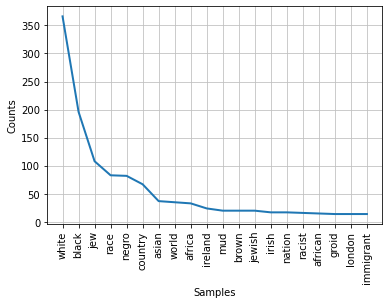

1936

In [338]:
# Frequently used words for Race/Ethnicity/Ancestry
rea = [w for w in words if w in REA]
fq_rea = nltk.FreqDist(w for w in rea if w.isalnum())
fq_rea.plot(20)

#### Religion/Political position

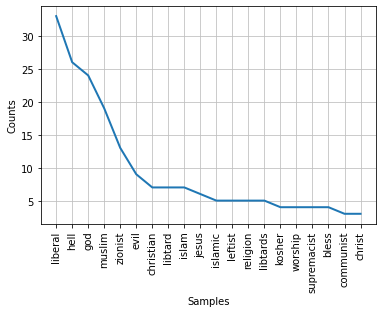

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [332]:
# Frequently used words for Religion/Political position
re = [w for w in words if w in RE]
fq_re = nltk.FreqDist(w for w in re if w.isalnum())
fq_re.plot(20)

#### Sexual Orientation/Sexual crime?assault?

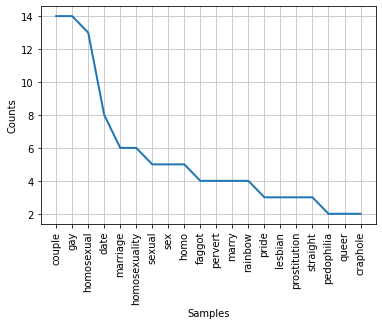

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [333]:
# Frequently used words for Sexual Orientation/Sexual crime?assault?
so = [w for w in words if w in SO]
fq_so = nltk.FreqDist(w for w in so if w.isalnum())
fq_so.plot(20)

#### Gender/Disability

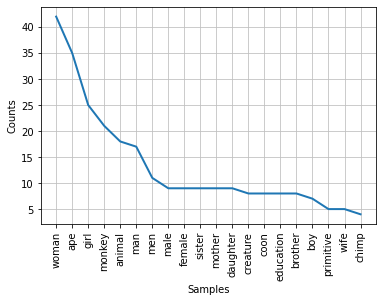

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [334]:
# Frequently used words for Gender/Disability
gd = [w for w in words if w in GD]
fq_gd = nltk.FreqDist(w for w in gd if w.isalnum())
fq_gd.plot(20)

In [356]:
rea_count = len(rea)
print(rea_count)
re_count = len(re)
print(re_count)
so_count = len(so)
print(so_count)
gd_count = len(gd)
print(gd_count)

1936
235
126
322


In [357]:
data = {'Type':['REA', 'RE', 'SO', 'GD'],
        'Frequency':[1936, 235, 126, 322]}
 
# Create DataFrame
df = pd.DataFrame(data)
df

,Type,Frequency
0,REA,1936
1,RE,235
2,SO,126
3,GD,322


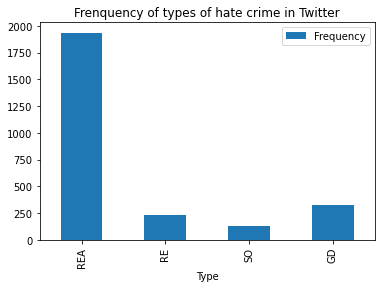

In [358]:
# Plot a bar graph
df.plot(x ='Type', y='Frequency', title='Frenquency of types of hate crime in Twitter', kind = 'bar')
plt.show()

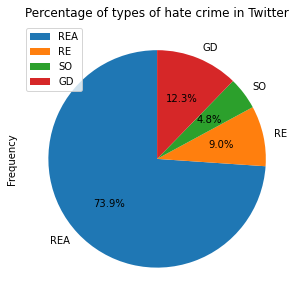

In [359]:
# Plot a pie graph
df = pd.DataFrame(data,columns=['Frequency'],index = ['REA','RE','SO','GD'])
df.plot.pie(y='Frequency',title='Percentage of types of hate crime in Twitter',
            figsize=(5, 5),autopct='%1.1f%%', startangle=90)
plt.show()